# SOK-1006 Mikro
## Seminar 3
### Oppgave 1

In [1]:
# importer pakkene som vi trenger
import numpy as np
from matplotlib import pyplot as plt
import sympy as sp

In [2]:
# definer symboler
N,A=sp.symbols('N A', positive=True)

#### Deloppgave b)

In [3]:
def prod(c,N,A):
    produksjon=1000*(c.exp(N)/(A+c.exp(N)))
    return produksjon
prod(sp,N,A)

1000*exp(N)/(A + exp(N))

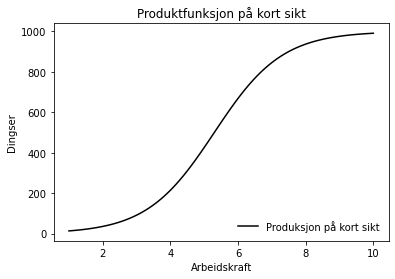

In [4]:
#tegn figur for K=1000, A=200
N_num=np.linspace(1,10,100)

plt.plot(N_num,prod(np,N_num,200), label='Produksjon på kort sikt', color='black')


plt.legend(loc='lower right', frameon=False)

plt.ylabel('Dingser')
plt.xlabel('Arbeidskraft')

plt.title('Produktfunksjon på kort sikt')

plt.show()

In [ ]:
# gjennomsnittsproduktivitet på kort sikt
def AP_kort(c,N,A):
    gjennom_prod=prod(c,N,A)/N
    return gjennom_prod

#grenseproduktiviteten på kort sikt


grense_prod= sp.diff(prod(sp,N,A),N)
  

MP_kort=sp.lambdify(
   (N,A), 
    grense_prod
)
MP_kort(N,A)



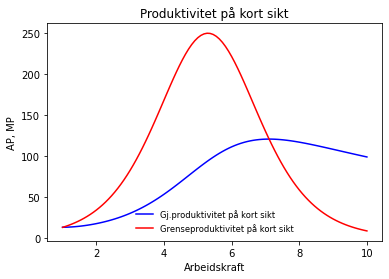

In [5]:
plt.plot(N_num,AP_kort(np,N_num,200), label='Gj.produktivitet på kort sikt', color='blue')

plt.plot(N_num,MP_kort(N_num,200), label='Grenseproduktivitet på kort sikt', color='red')

plt.legend(loc='lower center', fontsize='small', frameon=False)

plt.ylabel('AP, MP')
plt.xlabel('Arbeidskraft')

plt.title('Produktivitet på kort sikt')
plt.show()

In [25]:
# toppunkt for MP
diff_MP_kort=sp.diff(grense_prod,N)
sp.simplify (diff_MP_kort)


1000*((A + exp(N))**2 - 3*(A + exp(N))*exp(N) + 2*exp(2*N))*exp(N)/(A + exp(N))**3

In [7]:
#løs for toppunkt
N_max_mp=sp.solve(diff_MP_kort,N)[0]
#sett inn A=200
N_max_mp.subs(A,200)

log(200)

In [8]:
float(N_max_mp.subs(A,200))

5.298317366548036

Grenseproduktivitet er maksimert for N=log(200)=5.298.

#### Deloppgave d)

Skalautbytte på kort sikt (K fast): tenk at vi bruker N antall timer og produserer x Dingser, så fordobles antall arbeidstimer. Om vi får ut mer (mindre) enn dobbelt så mange Dingser har vi stigende (avtakende) skalautbytte. Får vi dobbelt så mye produksjon har vi konstant skalutbytte.

In [9]:
def prod_2(c,N,A):
    produksjon_2=1000*(c.exp(2*N)/(A+c.exp(2*N)))
    return produksjon_2
prod_2(sp,N,A)

1000*exp(2*N)/(A + exp(2*N))

In [10]:
overskudd=prod_2(sp,N,A)-2*prod(sp,N,A)
sp.simplify(overskudd)

1000*(-2*A + (A + exp(N))*exp(N) - 2*exp(2*N))*exp(N)/((A + exp(N))*(A + exp(2*N)))

In [11]:
# sett inn A=200
overskudd_ex=sp.simplify(overskudd.subs(A,200))
overskudd_ex

1000*((exp(N) + 200)*exp(N) - 2*exp(2*N) - 400)*exp(N)/((exp(N) + 200)*(exp(2*N) + 200))

In [27]:
N_range=sp.solve_univariate_inequality(overskudd_ex>0,N, relational=False)
N_range

Interval.open(log(100 - 40*sqrt(6)), log(40*sqrt(6) + 100))

In [13]:
float(sp.log(100-40*6**.5))

0.7033006039928141

In [14]:
float(sp.log(40*6**.5+100))

5.288163943115169

La oss tegne overskudd_ex.

In [ ]:
overskudd_ex_fn=sp.lambdify((N), overskudd_ex)
overskudd_ex_fn(N)

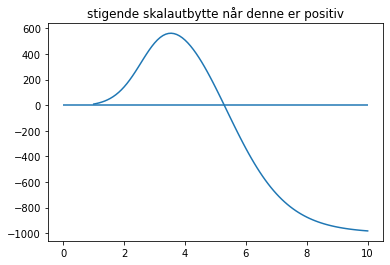

In [29]:
plt.plot(N_num, overskudd_ex_fn(N_num))
plt.hlines(0,0,10)
plt.title('stigende skalautbytte når denne er positiv')
plt.show()

Da ser vi at for 5.29>N>0.703 har vi stigende skalautbytte, og avtakende ellers.    
Tegne dette punktet inn i figuren fra oppgave b) sammen med grenseproduktivitet.

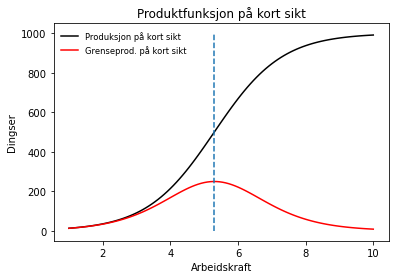

In [16]:
N_num=np.linspace(1,10,100)

plt.plot(N_num,prod(np,N_num,200), label='Produksjon på kort sikt', color='black')
plt.plot(N_num,MP_kort(N_num,200), label='Grenseprod. på kort sikt', color='red')
plt.vlines(5.29,0,1000, linestyle='dashed')

plt.legend(loc='upper left', frameon=False, fontsize='small')

plt.ylabel('Dingser')
plt.xlabel('Arbeidskraft')

plt.title('Produktfunksjon på kort sikt')
plt.show()

Ser du sammenhengen her?

#### Deloppgave e)

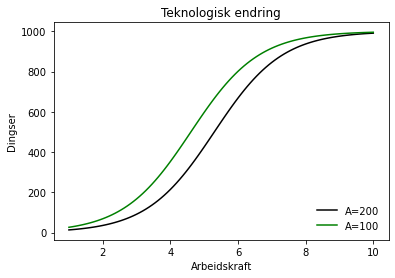

In [17]:
# tegn gammel (sort) og ny produktfunksjon (grønn) i samme figur
plt.plot(N_num,prod(np,N_num,200), label='A=200', color='black')
plt.plot(N_num,prod(np,N_num,100), label='A=100', color='green')


plt.legend(loc='lower right', frameon=False)

plt.ylabel('Dingser')
plt.xlabel('Arbeidskraft')

plt.title('Teknologisk endring')
plt.show()

Deloppgave f)

In [18]:
# økning i inntekt fra å ta i bruk den nye teknologien
def increase(c,N):
    return 500*(prod(c,N,100)-prod(c,N,200))

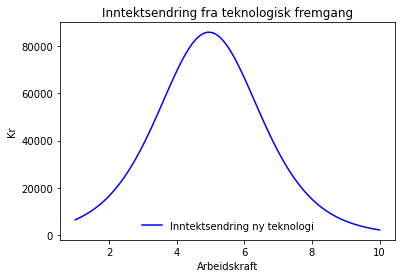

In [19]:
plt.plot(N_num,increase(np,N_num), label='Inntektsendring ny teknologi', color='blue')


plt.legend(loc='lower center', frameon=False)

plt.ylabel('Kr')
plt.xlabel('Arbeidskraft')

plt.title('Inntektsendring fra teknologisk fremgang')
plt.show()

#### Deloppgave g)

In [20]:
# Regne på punktet som maksimerer inntektsøkningen
grense_innt=sp.simplify(sp.diff(increase(sp,N),N))
grense_innt

50000000*(20000 - exp(2*N))*exp(N)/(exp(4*N) + 600*exp(3*N) + 130000*exp(2*N) + 12000000*exp(N) + 400000000)

In [21]:
sol=sp.solve(grense_innt,N)[0]
sol
# dette gir N som maksimerer inntektsøkningen

log(100*sqrt(2))

In [22]:
float(sol)

4.951743776268064

In [23]:
# maksimal økning i inntekt
increase(sp,float(sol))

85786.4376269050

#### Deloppgave h)

Dersom bedriftseieren kan justere antall timer brukt vil han velge N=4.95 og få en inntektsøkning på 85786 kr som ligger over de 50 000kr det koster å investere i den nye teknologien. Dersom han ikke kan justere antall timer og fortsatt må bruke 7 er økningen i inntekt gitt ved

In [24]:
float(increase(sp,7))

35338.9158076355

og da vil ikke den nye teknologien kjøpes inn!